# Data Import

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib
import numpy as np

In [2]:
pokemon = pd.read_csv('Pokemon.csv')
pokemon.head(5)

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [49]:
legendary_pokemon = pokemon[pokemon['legendary'] == True]
legendary_pokemon.head(5)

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
192,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
193,144,Galarian Articuno,Psychic,Flying,580,90,85,85,125,100,95,8,True
194,145,Galarian Zapdos,Fighting,Flying,580,90,125,90,85,90,100,8,True
195,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
196,146,Galarian Moltres,Dark,Flying,580,90,85,90,100,125,90,8,True


In [50]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1068 non-null   int64 
 1   name        1068 non-null   object
 2   type1       1068 non-null   object
 3   type2       572 non-null    object
 4   total       1068 non-null   int64 
 5   hp          1068 non-null   int64 
 6   attack      1068 non-null   int64 
 7   defense     1068 non-null   int64 
 8   sp_attack   1068 non-null   int64 
 9   sp_defense  1068 non-null   int64 
 10  speed       1068 non-null   int64 
 11  generation  1068 non-null   int64 
 12  legendary   1068 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.3+ KB


# Data Preparation

In [2]:

df = pd.read_csv('Pokemon.csv')

# Step 1: Select relevant columns
X = df[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]
y = df['legendary']

# Step 2: No missing or inconsistent data assumed in this example

# Step 3: No categorical variables need to be converted in this example

# Step 4: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)



In [52]:
X.head()

,hp,attack,defense,sp_attack,sp_defense,speed
0,60,62,63,80,80,60
1,80,82,83,100,100,80
2,80,100,123,122,120,80
3,80,82,83,100,100,80
4,39,52,43,60,50,65


In [53]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: legendary, dtype: bool

# Defining the Neural Network

In [3]:


model = keras.Sequential([
    layers.Dense(49, activation='relu', input_shape=[6]),
    layers.Dense(49, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


model.compile(
    optimizer="adam",
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 49)             │           343 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 49)             │         2,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,843 (11.11 KB)

 Trainable params: 2,843 (11.11 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:


history = model.fit(
    X_train, y_train,
    epochs=100,     # Number of epochs (iterations over the entire dataset)
    batch_size=32, # Number of samples per gradient update
    validation_data=(X_test, y_test) # Optional: Data used for validation during training
)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - binary_accuracy: 0.8121 - loss: 0.5656 - val_binary_accuracy: 0.8837 - val_loss: 0.3665
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9034 - loss: 0.3183 - val_binary_accuracy: 0.8837 - val_loss: 0.2993
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9041 - loss: 0.2730 - val_binary_accuracy: 0.9023 - val_loss: 0.2679
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9291 - loss: 0.2078 - val_binary_accuracy: 0.8977 - val_loss: 0.2503
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9426 - loss: 0.1822 - val_binary_accuracy: 0.8977 - val_loss: 0.2354
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9522 - loss: 0.1791 - val_binary_accuracy: 0.9116 - val_loss: 0.2234
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9443 - loss: 0.1605 - val_binary_accuracy: 0.9209 - val_loss: 0.2147
Epoch 8/100


<Axes: title={'center': 'Accuracy'}>

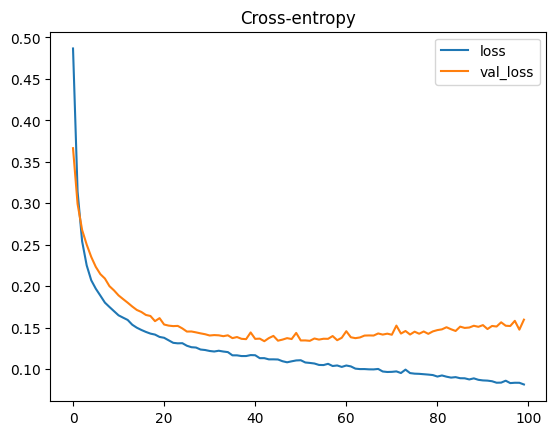

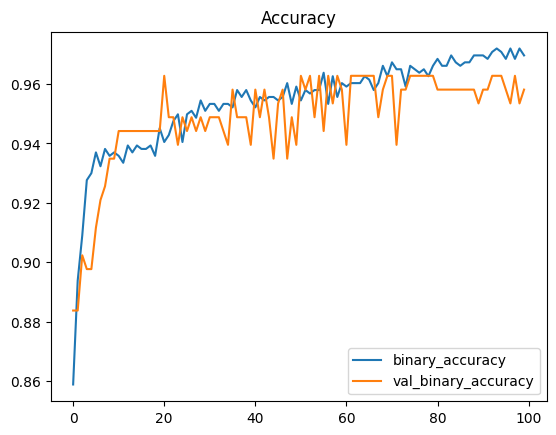

In [5]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

# Make Predictions

In [8]:
bulbasaur = np.array([45,49,49,65,65,45])
kangaskhan = np.array([105, 95, 80, 40, 80, 90])

suicune = np.array([100, 75, 115, 90, 115, 85])
zapdos = np.array([90,90,85,125,90,100])

# Combine the stats into a single array
pokemon_data = np.array([bulbasaur, kangaskhan, suicune, zapdos])

# Scale the data using the same scaler used during training
scaled_pokemon_data = scaler.transform(pokemon_data)  # Reusing the 'scaler' object

# Make predictions on the scaled data
predictions = model.predict(scaled_pokemon_data)

pokemon_names = ['Bulbasaur', 'Kangaskhan', 'Suicune', 'Zapdos']


for i, prediction in enumerate(predictions):
    print(f"Confidence for {pokemon_names[i]} being legendary: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Confidence for Bulbasaur being legendary: [0.00095513]
Confidence for Kangaskhan being legendary: [0.00134966]
Confidence for Suicune being legendary: [0.9147755]
Confidence for Zapdos being legendary: [0.68562794]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [9]:
lechonk = np.array([54,45,40,35,45,35])
oinkologne = np.array([110, 100, 75, 59, 80, 65])
skeledirge = np.array([104, 75, 100, 110, 75, 66])


chiyu = np.array([55,80,80,145,120,100])
koraidon = np.array([100, 135,115, 85, 110, 135])
wochien = np.array([85,90,100,100,135,75])

pokemon_test_data = np.array([lechonk, oinkologne, skeledirge, chiyu, koraidon, wochien])
scaled_pokemon_test_data = scaler.transform(pokemon_test_data)
predictions = model.predict(scaled_pokemon_test_data)

pokemon_test_names = ['Lechonk', 'Oinkologne', 'Skeledirge', 'Chiyu', 'Koraidon', 'Wochien']

for i, prediction in enumerate(predictions):
    print(f"Confidence for {pokemon_test_names[i]} being legendary: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Confidence for Lechonk being legendary: [0.00674495]
Confidence for Oinkologne being legendary: [0.00015314]
Confidence for Skeledirge being legendary: [0.08187132]
Confidence for Chiyu being legendary: [0.01766323]
Confidence for Koraidon being legendary: [0.98064876]
Confidence for Wochien being legendary: [0.74192226]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
